In [27]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from NFW import NFW
import numpy as np

In [31]:
전data300_noRT = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 2 no RT/dwarf_dm_7e8_0300.txt")

Mvir1 = 182009500.0 # the mass equals to the mass of the last data point that Jeon collected.
#Mvir2 = 2.85e8 # the mass is calculated by Dr Besla to estimate m_vir

NFW1 =  NFW(Mvir1) 
#NFW2 =  NFW(Mvir2)

dx300_noRT = 전data300_noRT[:,4] / 1000 # converting pc to kpc
dy300_noRT = 전data300_noRT[:,5] / 1000 # converting pc to kpc
dz300_noRT = 전data300_noRT[:,6] / 1000 # converting pc to kpc
r300_noRT = np.sqrt(dx300_noRT**2 + dy300_noRT**2 + dz300_noRT**2) # max closest to 9.76 kpc
rad_array300_noRT = np.arange(0.01, 9.76, 0.01)

density_profile300_noRT = np.zeros(np.size(rad_array300_noRT))
i = 0
for radius_value in rad_array300_noRT:
    particles = np.where((r300_noRT > radius_value) & (r300_noRT < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 0.01)**3 - radius_value**3)
    density_profile300_noRT[i] = how_many_particles / shell_volume * 500
    i += 1

#r = np.arange(0.01,1,0.1)

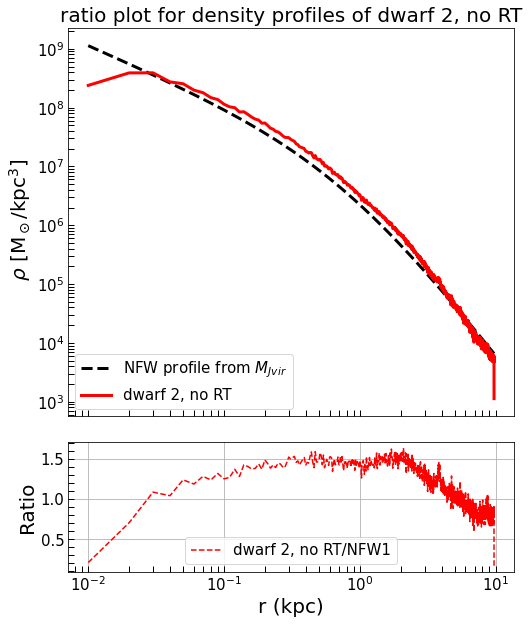

In [34]:
fig = plt.figure(figsize=(8, 10)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) # row, columns, widths

ax0 = plt.subplot(gs[0]) # top plot
ax1 = plt.subplot(gs[1]) # bottom plot


#fig, ax = plt.subplots(nrows=2, ncols=1,sharex=True)         # create three axis objects, returned in an array
fig.subplots_adjust(hspace=0.1)  


##################
# TOP PANEL

# Density for halo 1
ax0.loglog(rad_array300_noRT,NFW1.rho(rad_array300_noRT), 'k--', lw=3, label="NFW profile from $M_{Jvir}$")

# Density for halo 2
#ax0.loglog(rad_array300_noRT,NFW2.rho(rad_array300_noRT),'m-.', lw=3, label="NFW profile from $M_{est}$")

# Density from actual simulated data for dwarf 1, no RT
ax0.loglog(rad_array300_noRT,density_profile300_noRT,'r', lw=3, label="dwarf 2, no RT")

ax0.minorticks_on()

# if you want to set the limits for the top panel
#ax0.set_ylim(1e-6,0.01)
#ax0.set_xlim(0,900)

# set the title for the top panel
ax0.set_title('ratio plot for density profiles of dwarf 2, no RT', fontsize=20)

# Set labels for top panel
ax0.set_xticklabels([]) # ignore the x label
ax0.set_ylabel(r' $\rho$ [M$_\odot$/kpc$^3$] ', fontsize=20)

# set ticks for the top panel
ax0.tick_params(axis='both', which='both', direction='in',length=6, width=1)

# setting the legend only in the top panel
ax0.legend(loc='lower left')



######################
# BOTTOM PANEL. 

ax1.plot(rad_array300_noRT, density_profile300_noRT/(NFW1.rho(rad_array300_noRT)),'r--', \
        label='dwarf 2, no RT/NFW1') # ratio of the top two lines

ax1.legend(loc='lower center')

plt.xscale('log')

# Set axis labels for bottom panel
ax1.set_ylabel('Ratio',fontsize=20)
ax1.set_xlabel('r (kpc)', fontsize=20)

# If you want to set the limits
#ax1.set_xlim(0,10)
#ax1.set_ylim(0,2)

# setting ticks and grid for bottom panel
ax1.grid()
ax1.minorticks_on()
ax1.tick_params(axis='both', which='both', direction='in',length=6, width=1)

# setting font size
plt.rcParams.update({'font.size': 15})

# if you want to save the figure
#plt.savefig('figure.png')